D:\Python3.9.2\lib\site-packages\skimage\filters\_median.py:77: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  return generic.median(image, footprint=footprint, out=out)
D:\Python3.9.2\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)


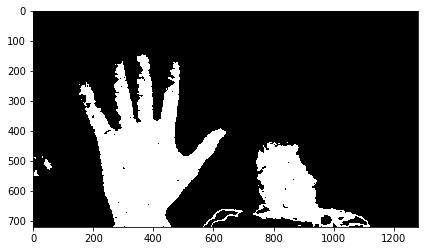

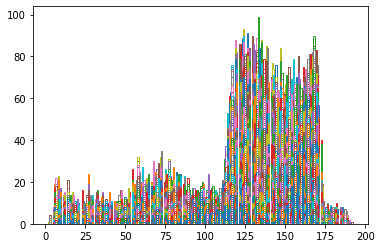

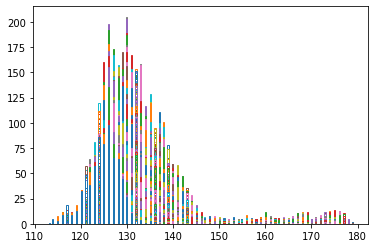

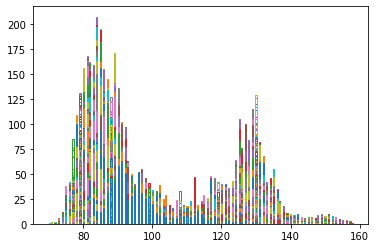

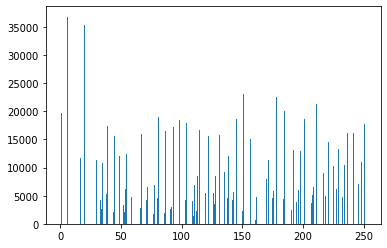

In [121]:
import cv2
import skimage.io as io
import numpy as np
from skimage.filters import median
from skimage.morphology import erosion, dilation
import matplotlib.pyplot as plt
from skimage.exposure import histogram
from matplotlib.pyplot import bar
from skimage.color import rgb2gray


def showHist(img):
    # An "interface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)

    bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align="center")


def getImageWithHist(image):
    # image=io.imread(name)
    G_levels = 256
    img = (255 * np.array(image)).astype(np.uint8)
    H = histogram(img, source_range="dtype")[0]
    H_c = np.cumsum(H)
    outputImage = (
        255
        * np.array(
            [
                [
                    round(
                        (G_levels - 1)
                        * H_c[pixelIntensity]
                        / (img.shape[0] * img.shape[1])
                    )
                    for pixelIntensity in row
                ]
                for row in img
            ]
        )
    ).astype(np.uint8)
    return outputImage


frame = io.imread("./0.jpg")
tempFrame = cv2.cvtColor(frame, cv2.COLOR_RGB2LAB)


L = tempFrame[:, :, 0]
A = tempFrame[:, :, 1]
B = tempFrame[:, :, 2]


H = np.arctan(B / A) * 180 / np.pi

C = np.sqrt((A * A) + (B * B))


l_lower = 0
l_upper = 115

a_lower = 130
a_upper = 150

b_lower = 120
b_upper = 140


h_lower = 40
h_upper = 50


c_lower = 4
c_upper = 11


l_bools = np.where((l_lower < L) & (L < l_upper), 255, 0)
a_bools = np.where((a_lower < A) & (A < a_upper), 255, 0)
b_bools = np.where((b_lower < B) & (B < b_upper), 255, 0)
h_bools = np.where((h_lower < H) & (H < h_upper), 255, 0)
c_bools = np.where((c_lower < C) & (C < c_upper), 255, 0)

kernel=np.full((3,3),1)
c_bools=dilation(dilation(erosion(erosion(c_bools,kernel),kernel),kernel),kernel)

w, h, _ = tempFrame.shape
gray = np.zeros((w, h))
gray = b_bools#l_bools & h_bools  # &c_bools

# gray =erosion(gray)
gray=median(gray,kernel,behavior='rank')
#

# plt.figure()
io.imshow(gray, cmap="gray")
io.show()

plt.hist(L, bins=256, histtype="step")
plt.show()
plt.hist(A, bins=256, histtype="step")
plt.show()
plt.hist(B, bins=256, histtype="step")
plt.show()

showHist(getImageWithHist(c))
